In [ ]:
!pip install yfinance pydataset

In [2]:
import yfinance as yf
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

In [3]:
def get_yfinance(id_name):
  df = yf.Ticker(id_name)
  return  df.history(period="max")

In [4]:
df_itausa = get_yfinance('ITSA4.SA')

<AxesSubplot: xlabel='Date'>

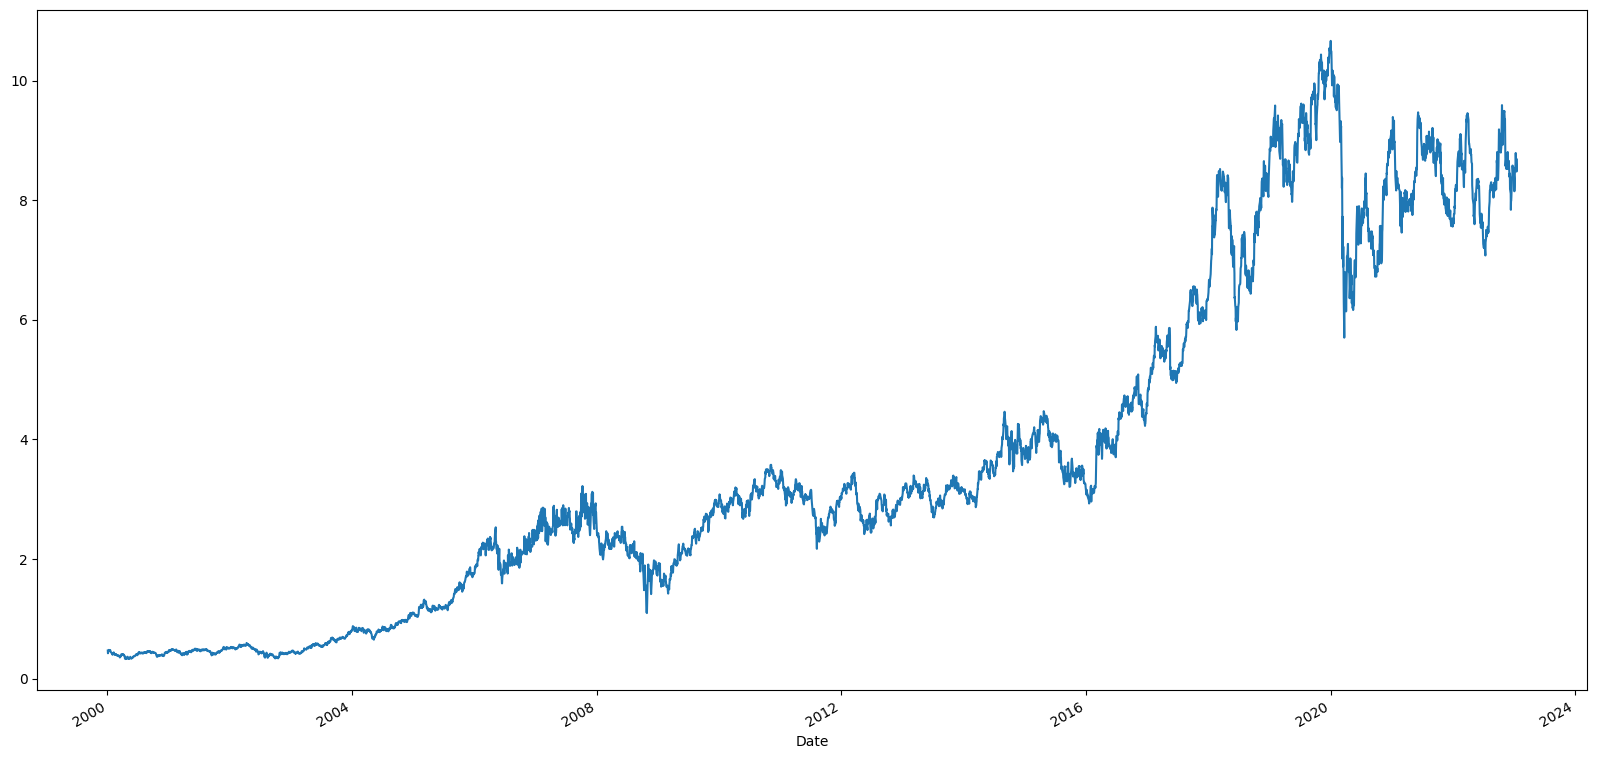

In [5]:
df_itausa['Close'].plot()

In [6]:
timeseries_titles = ['AirPassengers', 'nottem', 'ambientNOxCH', 'acme', 'sunspot.year', 'UKDriverDeaths', 
                    'USAccDeaths', 'UKgas', 'JohnsonJohnson', 'Nile', 'LakeHuron', 'austres', 
                    'lynx', 'deaths', 'drivers']
                    
df_air = data('AirPassengers')

In [7]:
len(timeseries_titles)

15

In [8]:

data('AirPassengers', show_doc=True )

AirPassengers

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Monthly Airline Passenger Numbers 1949-1960

### Description

The classic Box & Jenkins airline data. Monthly totals of international
airline passengers, 1949 to 1960.

### Usage

    AirPassengers

### Format

A monthly time series, in thousands.

### Source

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) _Time Series Analysis,
Forecasting and Control._ Third Edition. Holden-Day. Series G.

### Examples

    ## Not run: 
    ## These are quite slow and so not run by example(AirPassengers)
    ## The classic 'airline model', by full ML
    (fit <- arima(log10(AirPassengers), c(0, 1, 1),
                  seasonal = list(order = c(0, 1, 1), period = 12)))
    update(fit, method = "CSS")
    update(fit, x = window(log10(AirPassengers), start = 1954))
    pred <- predict(fit, n.ahead = 24)
    tl <- pred$pred - 1.96 * pred$se
    tu <- pred$pred + 1.96 * pred$se
    ts.plot(

In [9]:
df_air['date'] = pd.date_range(start = '1949-01-01', end='1961-01-01', freq='M' )

In [10]:
df_air.set_index('date', inplace=True)

<AxesSubplot: xlabel='date'>

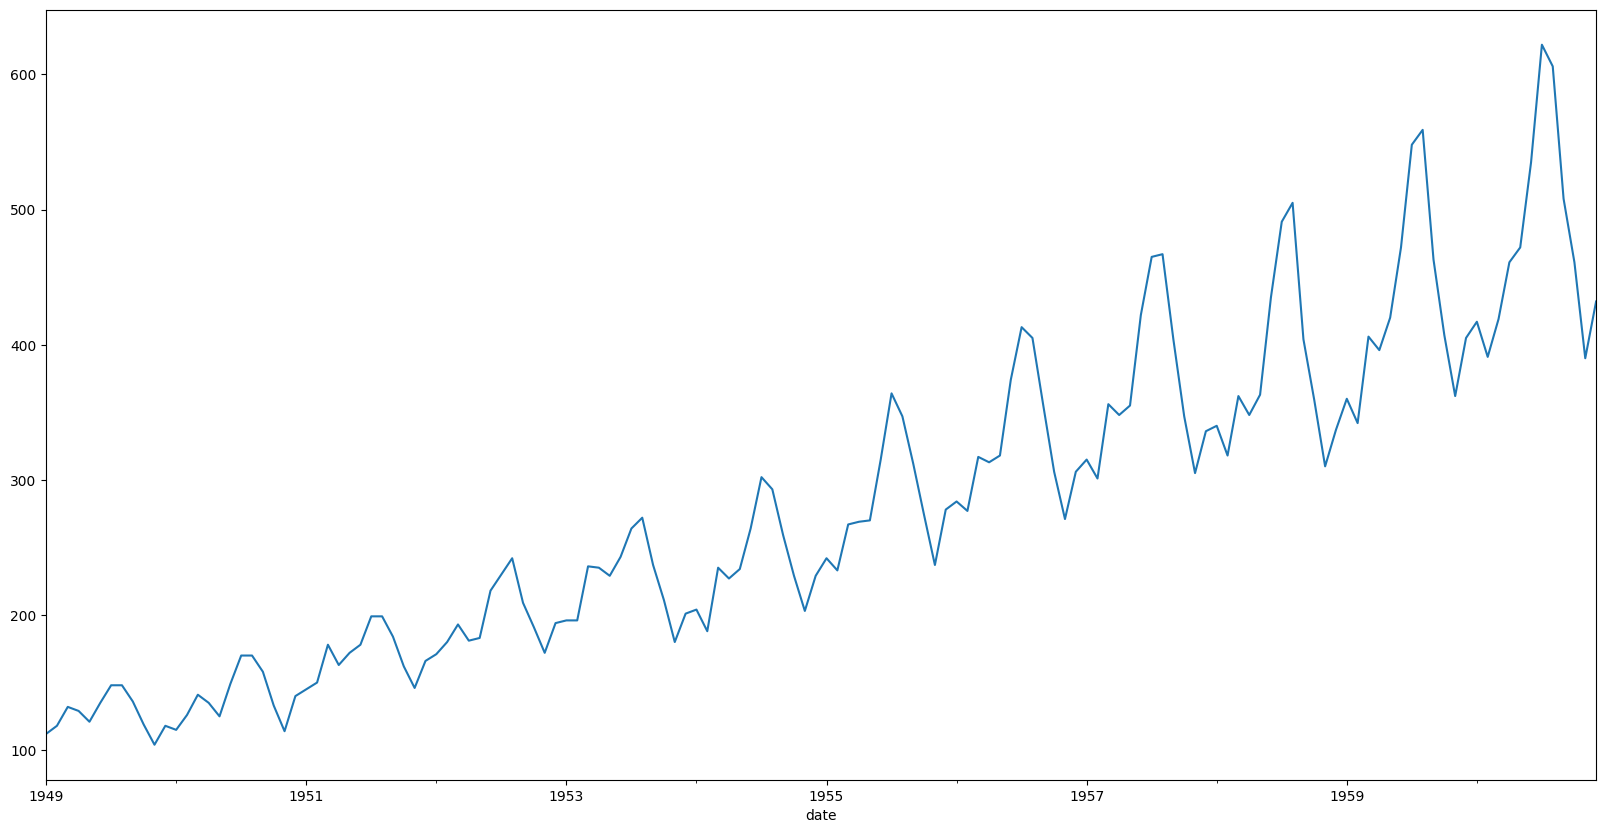

In [11]:
df_air['AirPassengers'].plot()

In [12]:
example_ma = [1,2,3,4,5,6,7,8,9,10]
ma_size=2

for i in range(ma_size, len(example_ma)):
  consider_val = example_ma[i-ma_size:i]
  print(f'valores considerados: {consider_val}, MA {np.mean(consider_val)}, valor atual {i}')

valores considerados: [1, 2], MA 1.5, valor atual 2
valores considerados: [2, 3], MA 2.5, valor atual 3
valores considerados: [3, 4], MA 3.5, valor atual 4
valores considerados: [4, 5], MA 4.5, valor atual 5
valores considerados: [5, 6], MA 5.5, valor atual 6
valores considerados: [6, 7], MA 6.5, valor atual 7
valores considerados: [7, 8], MA 7.5, valor atual 8
valores considerados: [8, 9], MA 8.5, valor atual 9


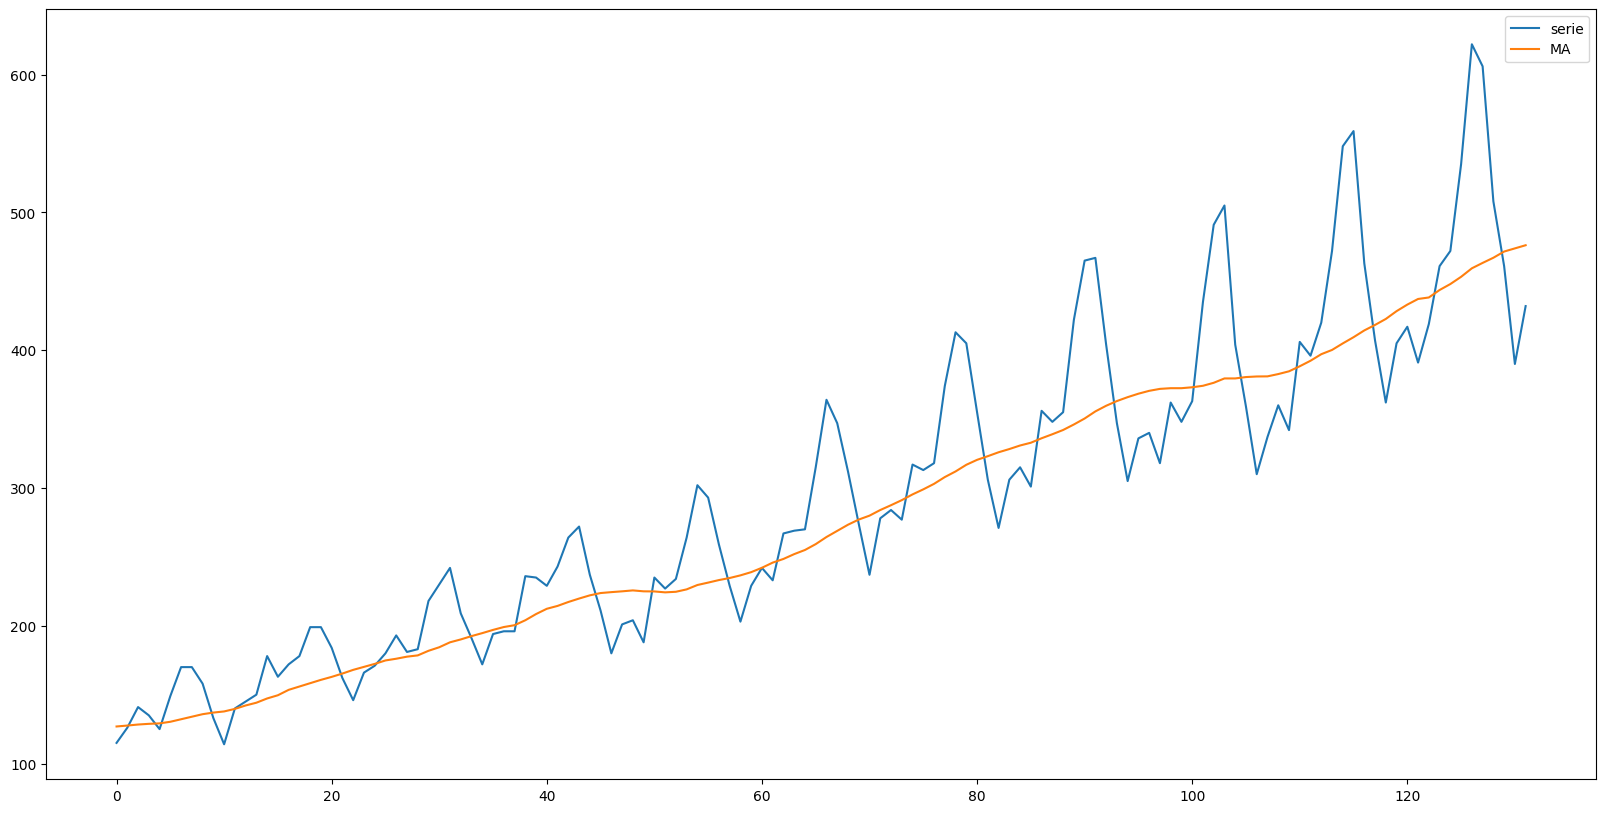

In [13]:
def show_trend(ts, ma_size):
  to_show = pd.DataFrame()

  to_show['serie'] = ts.values[ma_size:]
  to_show['MA']  = ts.rolling(ma_size).mean().values[ma_size:]
  to_show.plot()
  plt.show()

ts = df_air['AirPassengers']
ma_size=12
show_trend(ts, ma_size)

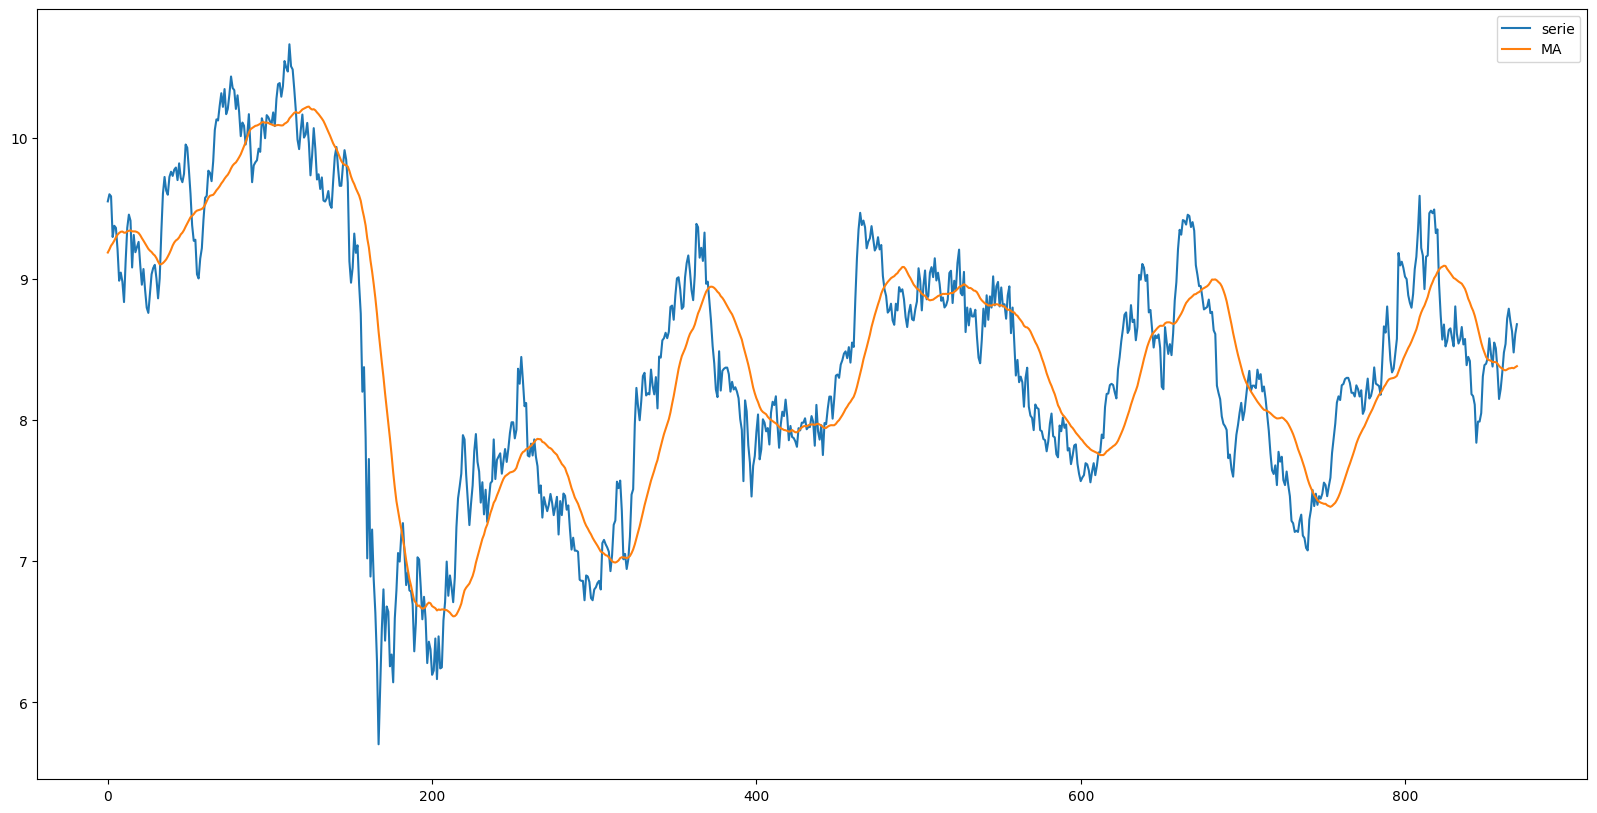

In [14]:
ts = df_itausa['Close'].iloc[-900:]
ma_size=30
show_trend(ts, ma_size)

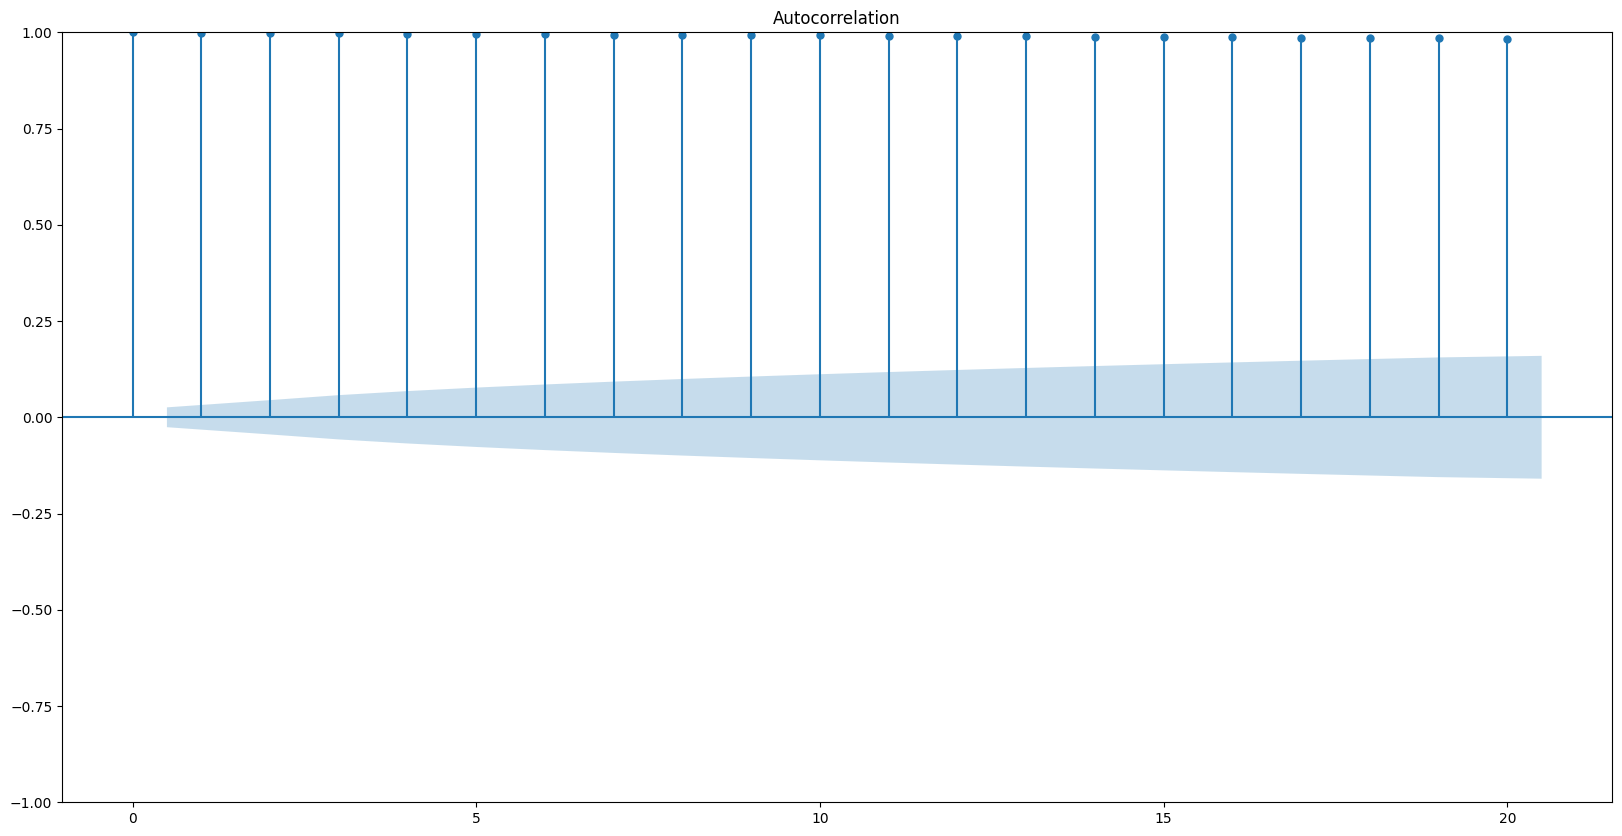

In [16]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df_itausa['Close'].values.squeeze(), lags=20)
plt.show()

/home/rivaldojr/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


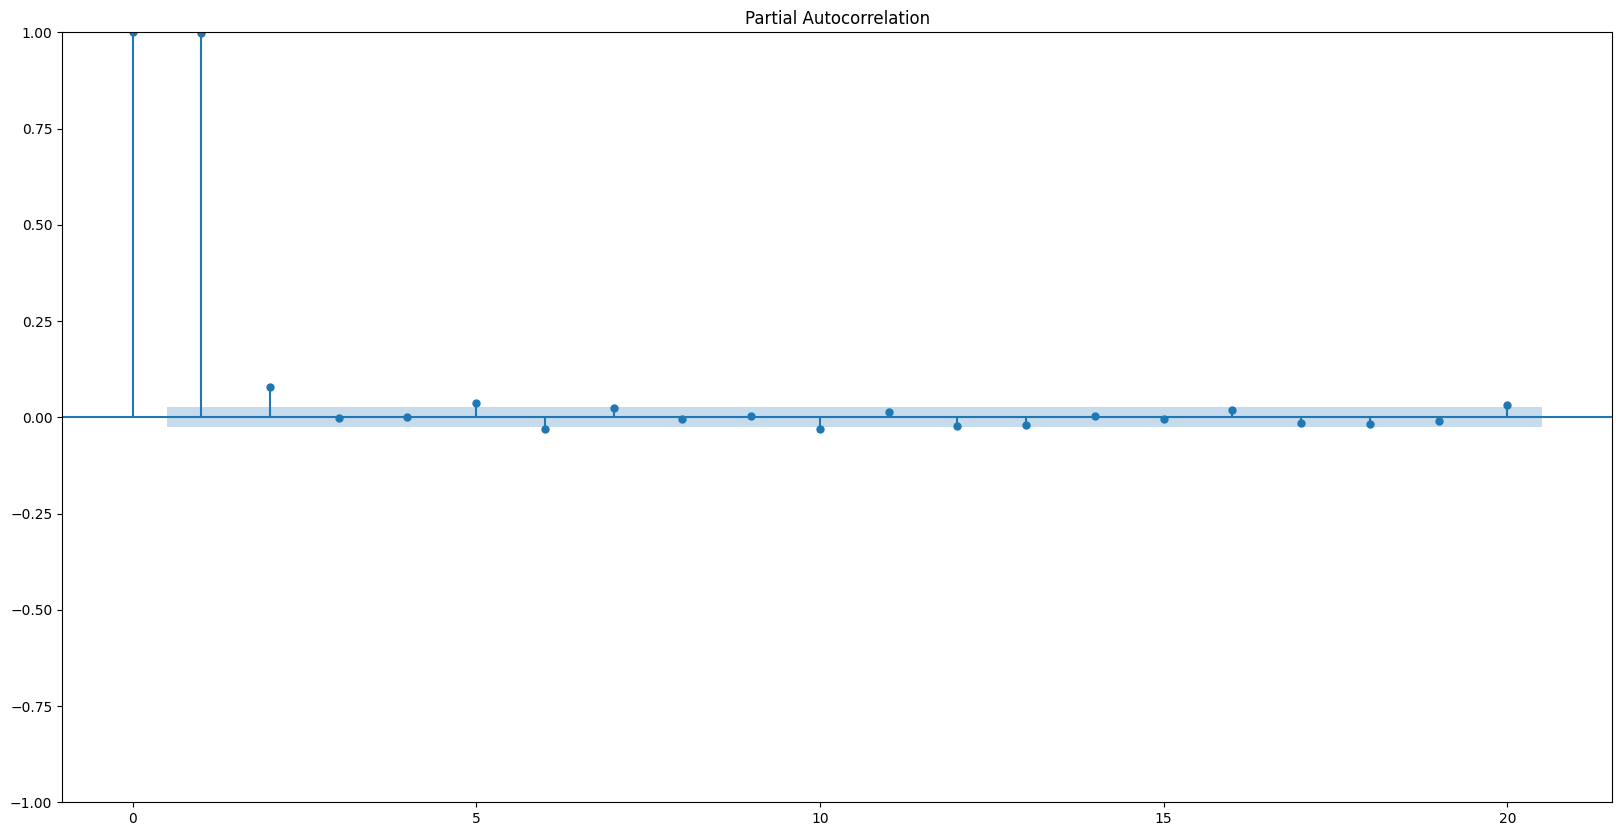

In [17]:
sm.graphics.tsa.plot_pacf(df_itausa['Close'].values.squeeze(), lags=20)

plt.show()

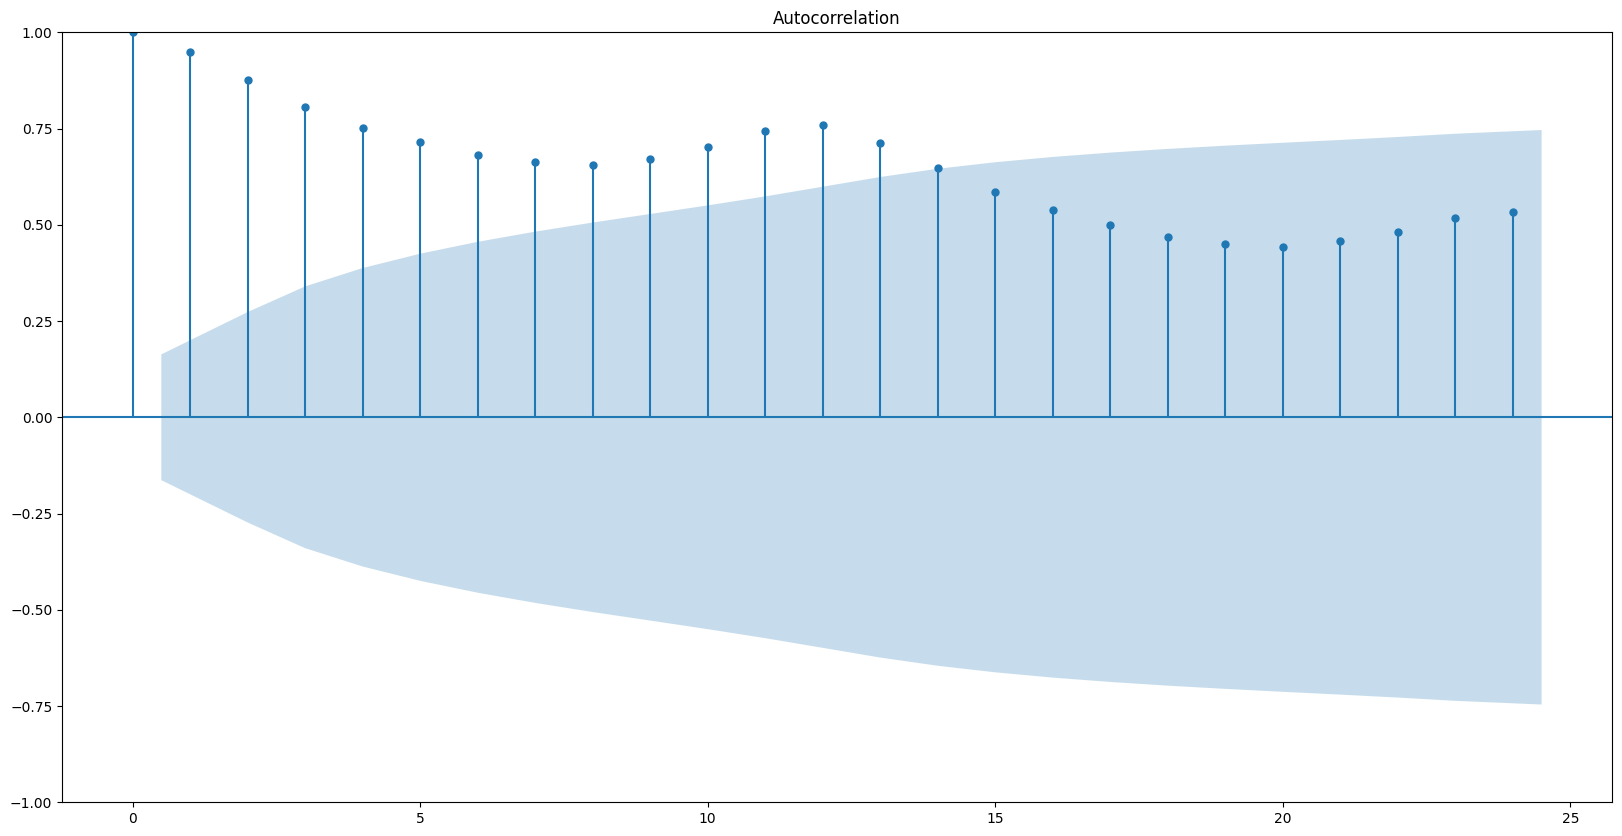

In [18]:
sm.graphics.tsa.plot_acf(df_air['AirPassengers'].values.squeeze(), lags=24)

plt.show()

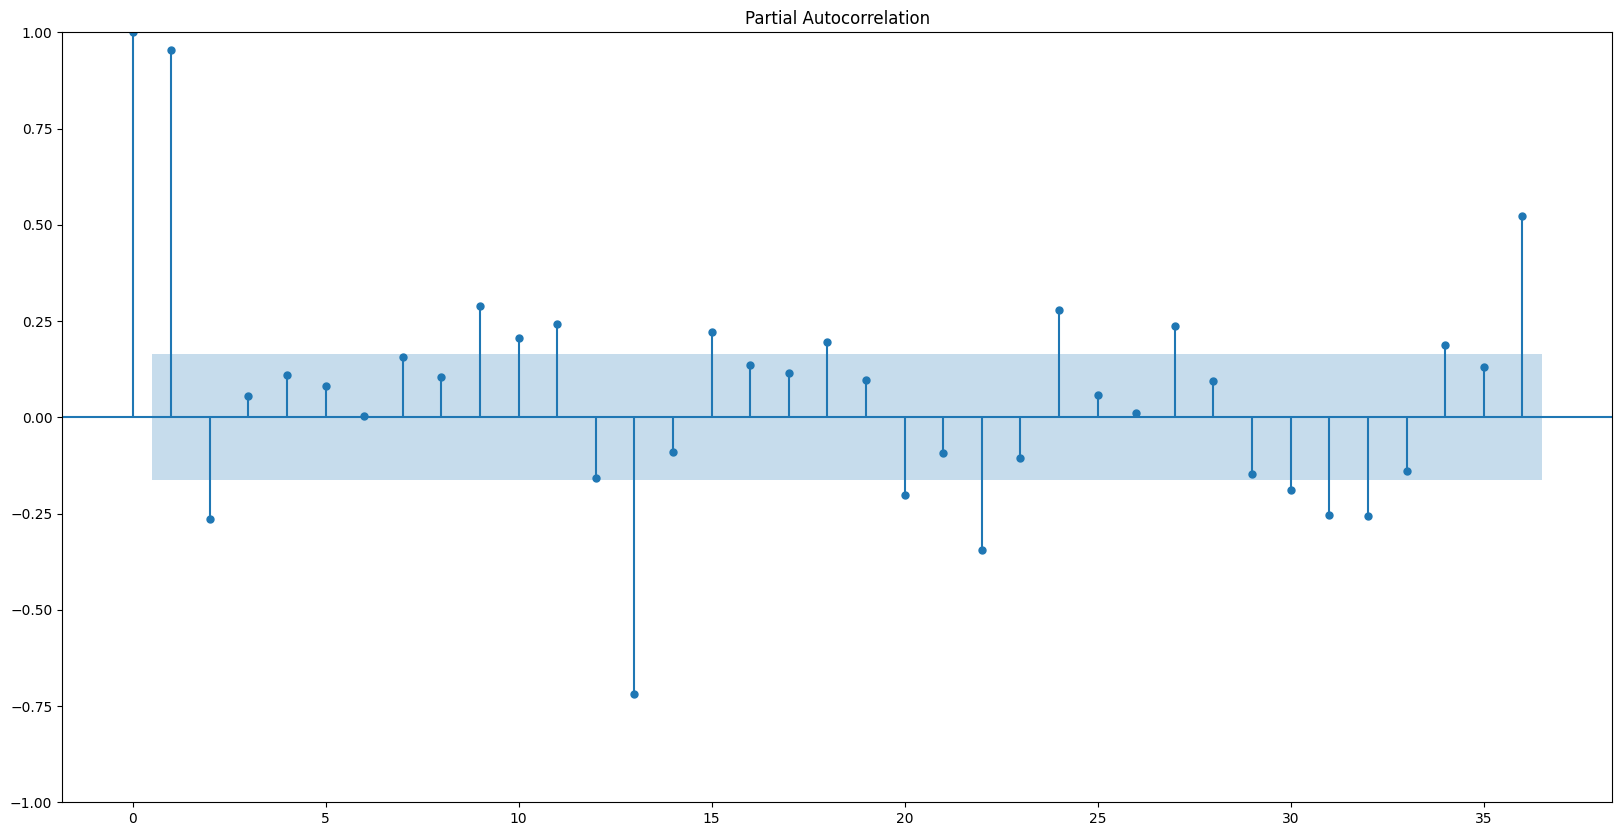

In [19]:

sm.graphics.tsa.plot_pacf(df_air['AirPassengers'].values.squeeze(), lags=36)

plt.show()

 Atividade 1

 - selecionar 2 séries: uma financeira e uma adicional (sugestão, uma disponível no pydataset)
 - plot da média movél 
 - análise de quais componentes foram observados nas séries
 - Calcularem o ACF e PACF das séries
 - analisar a série "sem_nome", identificar os componentes e defina essa série 